In [3]:
!pip install mocpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.6/927.6 kB 61.4 MB/s eta 0:00:00


In [4]:
!pip install ipyaladin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 6.9 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.6/717.6 kB 34.6 MB/s eta 0:00:00


In [5]:
!pip install pyvo

In [23]:
!pip install anywidget

In [6]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0

# For plots
import matplotlib.pyplot as plt

In [7]:
# the catalogue name in VizieR
CATALOGUE = "VI/25"

In [8]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [9]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

POSS Plate Data
Short Name: VI/25
IVOA Identifier: ivo://cds.vizier/vi/25
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

This catalog contains plate-center and observational data for all plates of
the National Geographic Society and Palomar Observatory Sky Survey (POSS) and
its Whiteoak Extension. The POSS proper consists of photographic reproductions
of red-sensitive (Kodak 103a-E) and blue-sensitive (Kodak 103a-O) plates taken
of 937 different fields with the 48-inch Palomar Schmidt telescope, covering
the entire sky above -33 degrees declination. This southern limit was extended
to about -45 degrees by J.B. Whiteoak using the same instrument for a series
of 100 photographs that have come to be known as the Whiteoak Extension; thus,
the survey as a whole includes 1037 fields. This version of the catalogue
consists of plate information reproduced from the Catalogue of Plates and
plate information on the Whiteoak Extension derived from file header

In [10]:
voresource.creators[0]

'Palomar Observatory'

In [11]:
tables = voresource.get_tables()
tables

{'VI/25/nposs': <VODataServiceTable name="VI/25/nposs">... 24 columns ...</VODataServiceTable>}

In [12]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['VI/25/nposs']

In [13]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

In [14]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/VI/25'

In [17]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno  POSS   MLP   RAradmin  ...       DE1950            _RA_icrs           _DE_icrs     
                      rad     ...        deg                deg                deg        
int32 object int16  float64   ...      float64            float64            float64      
----- ------ ----- ---------- ... ------------------ ------------------ ------------------
  532   1320   532 0.69806927 ...  6.386666666666666  43.92077694444444  6.588313333333333
  533   1471   533 0.80279559 ...  6.346944444444444  49.92285805555555  6.527418333333332
  473     11   473 0.80225271 ... 12.346666666666666 49.991563611111104 12.526920833333332
  531   1306   531 0.59327072 ...  6.422222222222222  37.91423555555555  6.642844444444443
  471   1300   471 0.59250075 ... 12.422499999999998  37.96590694444444  12.64298722222222
  472     15   472 0.69737542 ... 12.389444444444443 43.979006388888884  12.59092222222222
  412    425   412 0.69594175 ... 18.387777777777774  44.03824

In [18]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (43.92333984375, 6.579592944977629)

In [19]:
conesearch_records = voresource.get_service("conesearch").search(
pos=conesearch_center,
sr=conesearch_radius,
)
conesearch_records

<DALResultsTable length=1>
 _RAJ2000  _DEJ2000    _r   recno POSS  MLP  ... Erate Orate  RA1950    DE1950   _RA.icrs   _DE.icrs
   deg       deg                             ...                                                    
 float64   float64  float64 int32 str4 int16 ...  str3  str3   str8      str9     str10       str9  
--------- --------- ------- ----- ---- ----- ... ----- ----- -------- --------- ---------- ---------
 43.92078   6.58831 0.00908   532 1320   532 ...     2     3 02 53 02 +06 23 12 02 55 41.0 +06 35 18

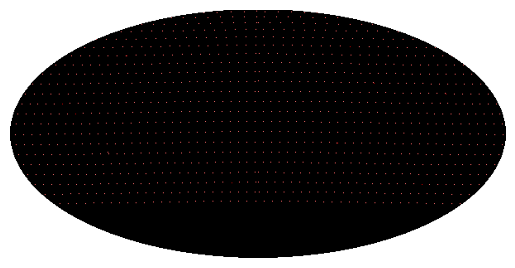

In [20]:
# retrieve the MOC
catalogue_coverage = MOC.from_fits(
f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()

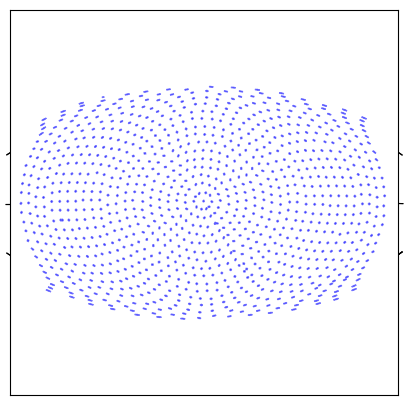

In [21]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

In [22]:
aladin = Aladin()
aladin

/home/dutta/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:592: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  if trait.get_metadata('sync'):
/home/dutta/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Aladin(init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opacity', 'gri…

In [ ]:
aladin.add_table(conesearch_records.to_table())

In [ ]:
aladin.add_table(tap_records.to_table())

In [ ]:
aladin.add_moc_from_URL(
f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
moc_options={"opacity": 0.5, "color": "pink"},
)